# Case Study: Students Performance in Exam
**Author: Julio Venero**

*July, 2021*

## Introduction
The following analysis has the **objective** of understanding which attributes are more related to the students' performance.
Since this is a learning activity, the results obtained should not be taken as conclusive.

The dataset used for this case study contains marks secured by high school students in US. The data was obtained from this [link](https://www.kaggle.com/spscientist/students-performance-in-exams). Thanks to [Jakki Seshapanpu](https://www.kaggle.com/spscientist) for uploading it to Kaggle.

### Libraries needed:
* Pandas for Data wrangling and Analysis
* Numpy for Mathematical functions
* Matlibplot and Seaborn for Data visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## STEP 1: IMPORTING DATASET AND INITIAL EXPLORATION

In [3]:
stdPerf = pd.read_csv('StudentsPerformance.csv')
stdPerf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print("Check data types and missing values (Null)")
print("")
stdPerf.info()

Check data types and missing values (Null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
print("Numeric variables - Basic Statistics")
stdPerf.describe()

Numeric variables - Basic Statistics


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
print("Categorical variables - Basic Statistics")
stdPerf.describe(include=['O'])

Categorical variables - Basic Statistics


,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


## Step 2: Data Wrangling
Data Pre-processing phase to make sure the data is clean for the analysis

### Validate Consistency of Categorical variables

In [7]:
stdPerf.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
catCols = set(stdPerf.columns) - set(stdPerf._get_numeric_data().columns)
for i in catCols:
    print("VARIABLE: " + i.upper())
    print(stdPerf[i].value_counts())
    print("")

VARIABLE: LUNCH
standard        645
free/reduced    355
Name: lunch, dtype: int64

VARIABLE: TEST PREPARATION COURSE
none         642
completed    358
Name: test preparation course, dtype: int64

VARIABLE: PARENTAL LEVEL OF EDUCATION
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

VARIABLE: GENDER
female    518
male      482
Name: gender, dtype: int64

VARIABLE: RACE/ETHNICITY
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64



### Convert to the right data type

In [9]:
stdPerf.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
for i in catCols:
    stdPerf[i] = stdPerf[i].astype('category')
print("Conversion complete")

Conversion complete


In [11]:
stdPerf.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
dtype: object

## Step 3: Exploratory Data Analysis

### Univariate Analysis

Text(0.5, 1.0, 'Writing Score Distribution')

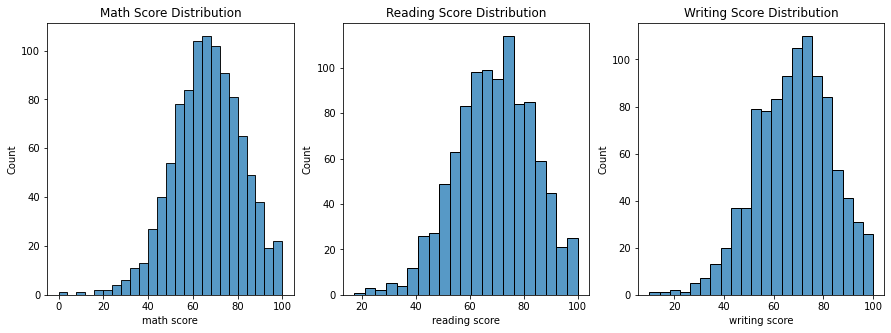

In [12]:
fig, axs = plt.subplots(ncols=3, figsize = (15,5))

sns.histplot(data=stdPerf, x='math score', ax=axs[0])
axs[0].set_title('Math Score Distribution')

sns.histplot(data=stdPerf, x='reading score', ax=axs[1])
axs[1].set_title('Reading Score Distribution')

sns.histplot(data=stdPerf, x='writing score', ax=axs[2])
axs[2].set_title('Writing Score Distribution')

### Multivariate analysis

Scores vs Gender


Text(0.5, 1.0, 'Writing Score Distribution')

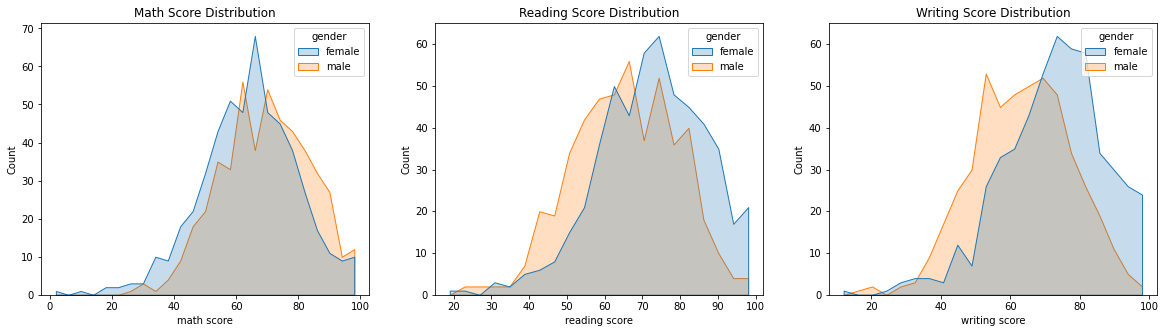

In [13]:
print("Scores vs Gender")
fig, axs = plt.subplots(ncols=3, figsize = (20,5))

sns.histplot(data=stdPerf, x='math score', ax=axs[0], hue='gender', element='poly')
axs[0].set_title('Math Score Distribution')

sns.histplot(data=stdPerf, x='reading score', ax=axs[1], hue='gender', element='poly')
axs[1].set_title('Reading Score Distribution')

sns.histplot(data=stdPerf, x='writing score', ax=axs[2], hue='gender', element='poly')
axs[2].set_title('Writing Score Distribution')

* The distributions are similar regarding the gender.
* For Reading and Writing, females' score distribution is more skewed to the right (more females with higher scores)
* For Math, males' score distribution is slightly more skewed to the right (more males with higher scores)

Scores vs Lunch


Text(0.5, 1.0, 'Writing Score Distribution')

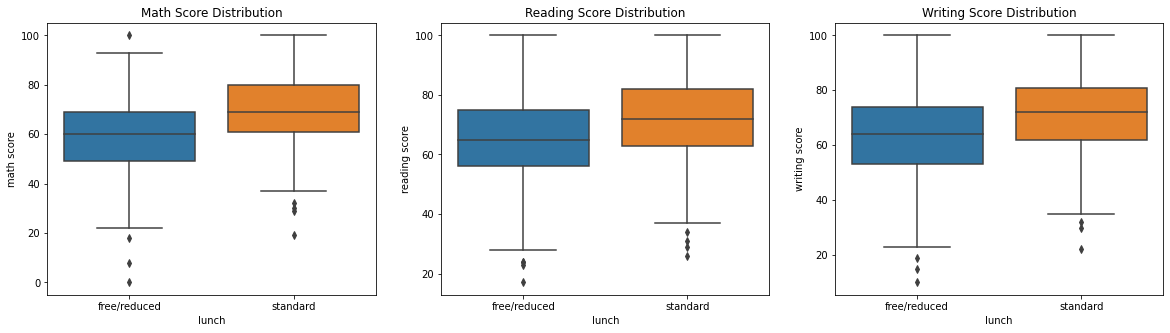

In [14]:
print("Scores vs Lunch")
fig, axs = plt.subplots(ncols=3, figsize = (20,5))

sns.boxplot(data=stdPerf, y='math score', ax=axs[0], x='lunch')
axs[0].set_title('Math Score Distribution')

sns.boxplot(data=stdPerf, y='reading score', ax=axs[1], x='lunch')
axs[1].set_title('Reading Score Distribution')

sns.boxplot(data=stdPerf, y='writing score', ax=axs[2], x='lunch')
axs[2].set_title('Writing Score Distribution')

Here, we can notice that those students with a standard lunch have in average better scores than those with a free/reduced lunch

Scores vs Parental Level of Education


Text(0.5, 1.0, 'Writing Score Distribution')

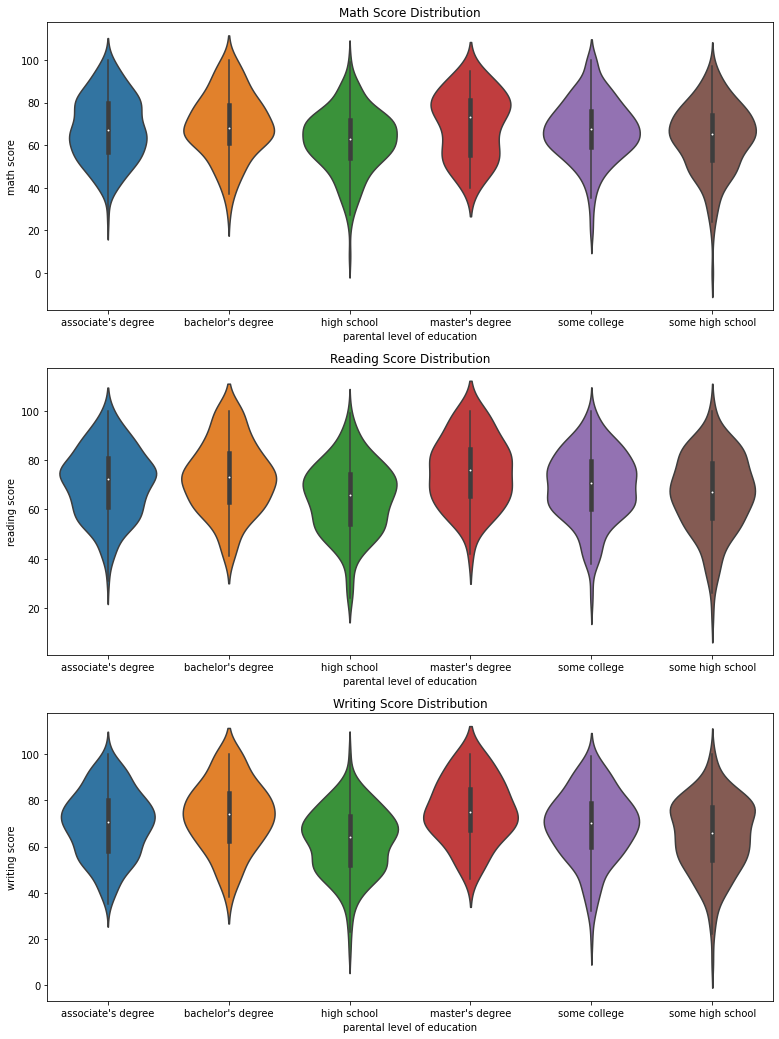

In [15]:
print("Scores vs Parental Level of Education")
fig, axs = plt.subplots(nrows=3, figsize = (13,18))

sns.violinplot(data=stdPerf, y='math score', ax=axs[0], x='parental level of education')
axs[0].set_title('Math Score Distribution')

sns.violinplot(data=stdPerf, y='reading score', ax=axs[1], x='parental level of education')
axs[1].set_title('Reading Score Distribution')

sns.violinplot(data=stdPerf, y='writing score', ax=axs[2], x='parental level of education')
axs[2].set_title('Writing Score Distribution')

No significant difference

Scores vs Race/Ethnicity


Text(0.5, 1.0, 'Writing Score Distribution')

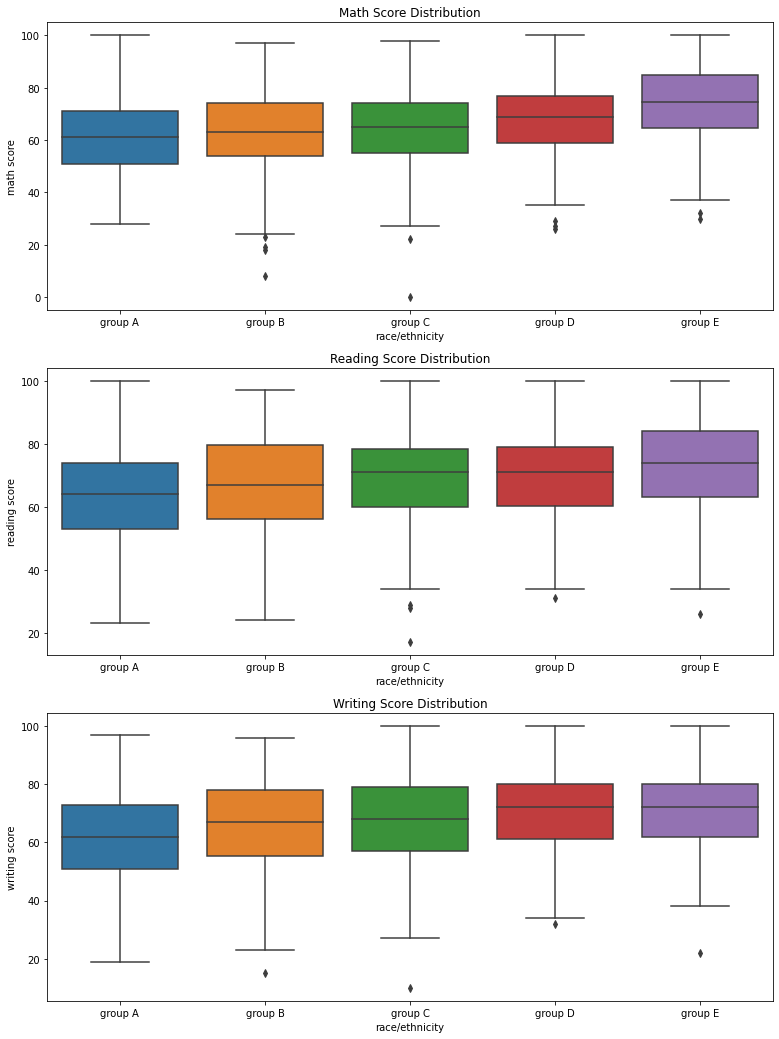

In [16]:
print("Scores vs Race/Ethnicity")
fig, axs = plt.subplots(nrows=3, figsize = (13,18))

sns.boxplot(data=stdPerf, y='math score', ax=axs[0], x='race/ethnicity')
axs[0].set_title('Math Score Distribution')

sns.boxplot(data=stdPerf, y='reading score', ax=axs[1], x='race/ethnicity')
axs[1].set_title('Reading Score Distribution')

sns.boxplot(data=stdPerf, y='writing score', ax=axs[2], x='race/ethnicity')
axs[2].set_title('Writing Score Distribution')

Students in group E have slightly better scores, while those in group A have the lowest scores.

Scores vs Test Preparation Course


Text(0.5, 1.0, 'Writing Score Distribution')

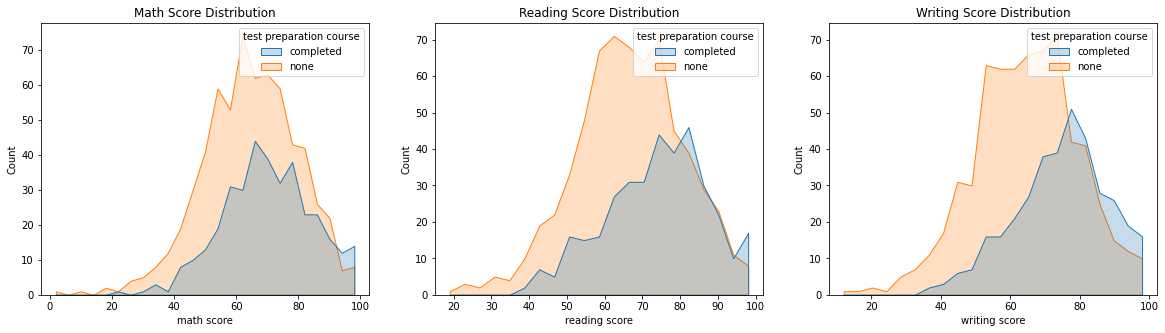

In [17]:
print("Scores vs Test Preparation Course")
fig, axs = plt.subplots(ncols=3, figsize = (20,5))

sns.histplot(data=stdPerf, x='math score', ax=axs[0], hue='test preparation course', element='poly')
axs[0].set_title('Math Score Distribution')

sns.histplot(data=stdPerf, x='reading score', ax=axs[1], hue='test preparation course', element='poly')
axs[1].set_title('Reading Score Distribution')

sns.histplot(data=stdPerf, x='writing score', ax=axs[2], hue='test preparation course', element='poly')
axs[2].set_title('Writing Score Distribution')

The distribution of students who completed the preparation course is slightly more skewed to the right (higher scores)

## Check for correlation

In [18]:
correlation = stdPerf.corr()
print(correlation)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


<AxesSubplot:>

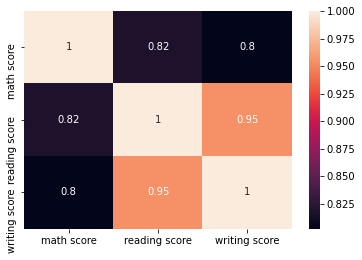

In [19]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

Reading and writing scores are highly correlated (0.95/1)

## Group Analysis
Now, let's divide the students according to their average scores (data binning) to check for patterns in the upper and lower segments

First, calculate the average score

In [31]:
stdPerf['average score'] = (stdPerf['math score'] + stdPerf['reading score'] + stdPerf['writing score'])/3
stdPerf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Now, group the students within 5 categories according to their average score

In [32]:
bins = np.linspace(min(stdPerf['average score']), max(stdPerf['average score']), 6)
group_names = ['Terrible', 'Unsatisfactory', 'Average', 'Good enough', 'Superb']
stdPerf['score category'] = pd.cut(stdPerf['average score'], bins, labels=group_names, include_lowest=True)
stdPerf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,score category
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Good enough
1,female,group C,some college,standard,completed,69,90,88,82.333333,Superb
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Superb
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Average
4,male,group C,some college,standard,none,76,78,75,76.333333,Good enough


### What are the average scores for each category?

In [65]:
stdPerf.groupby('score category').agg(['count','min','max','mean'])

math score                     reading score           \
                    count min  max       mean         count min  max   
score category                                                         
Terrible                6   0   30  19.000000             6  17   32   
Unsatisfactory         52  19   53  38.173077            52  28   53   
Average               302  35   73  54.506623           302  41   73   
Good enough           472  51   94  70.105932           472  57   89   
Superb                168  69  100  85.946429           168  78  100   

                          writing score                     average score  \
                     mean         count min  max       mean         count   
score category                                                              
Terrible        24.333333             6  10   28  19.500000             6   
Unsatisfactory  41.076923            52  27   50  39.096154            52   
Average         56.960265           302  40   73  55.248344           302   
Good enough     73.381356           472  57   87  72.582627           472   
Superb          89.577381           168  75  100  89.047619           168   

                                                  
                      min         max       mean  
score category                                    
Terrible         9.000000   26.000000  20.944444  
Unsatisfactory  29.333333   45.333333  39.448718  
Average         45.666667   63.333333  55.571744  
Good enough     63.666667   81.666667  72.023305  
Superb          82.000000  100.000000  88.190476

Most of the students have scores above the average

### What are the main characteristics of those students in the superb category?

In [55]:
superbStd = stdPerf[stdPerf['score category'] == 'Superb']
superbStd.describe(include=['category'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score category
count,168,168,168,168,168,168
unique,2,5,6,2,2,1
top,female,group C,associate's degree,standard,completed,Superb
freq,108,50,42,140,90,168


* More females than males (64.3%)
* 30% belong to group C ethnicity
* Most of the students had a standard lunch (83.3%)
* Only slightly more than half of students took the test preparation course

### What are the main characteristics of those students with scores below average?

In [58]:
belowAvgStd = stdPerf[stdPerf['score category'].isin(['Terrible','Unsatisfactory'])]
belowAvgStd.describe(include=['category'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score category
count,58,58,58,58,58,58
unique,2,5,6,2,2,2
top,male,group C,high school,free/reduced,none,Unsatisfactory
freq,30,19,18,41,48,52


* No differences by gender (almost 50/50)
* More than 70% of these students have a free/reduced lunch
* Most of these students (82.75%) took the test preparation course

### Looks like the lunch is highly correlated with the scores
Let's transform it to a numeric variable to calculate the correlation coefficient

In [68]:
stdPerf['lunchNum'] = np.where(stdPerf['lunch'] == 'standard', 1, 0)
stdPerf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,score category,lunchNum
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Good enough,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,Superb,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Superb,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Average,0
4,male,group C,some college,standard,none,76,78,75,76.333333,Good enough,1


Calculate the correlation coefficient

In [75]:
stdPerf.corr()['lunchNum']

math score       0.350877
reading score    0.229560
writing score    0.245769
average score    0.290064
lunchNum         1.000000
Name: lunchNum, dtype: float64

There is a positive correlation between the scores and lunch, specially with Math

Average Score vs Lunch


<AxesSubplot:xlabel='average score', ylabel='lunch'>

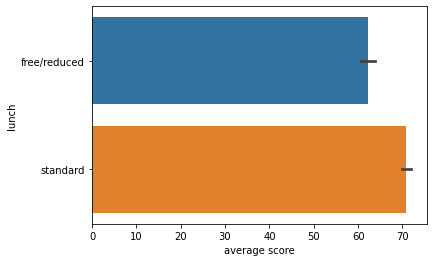

In [80]:
print("Average Score vs Lunch")
#fig, axs = plt.subplots(ncols=3, figsize = (20,5))

sns.barplot(data=stdPerf, y='lunch', x='average score')


Students with a standard lunch have in average better scores than those with a free/reduced lunch

### Let's analyze the race/ethnicity and parent level of education for students below average and students with superb scores

Race/ethnicity Analysis


Text(0.5, 1.0, 'Students with superb scores')

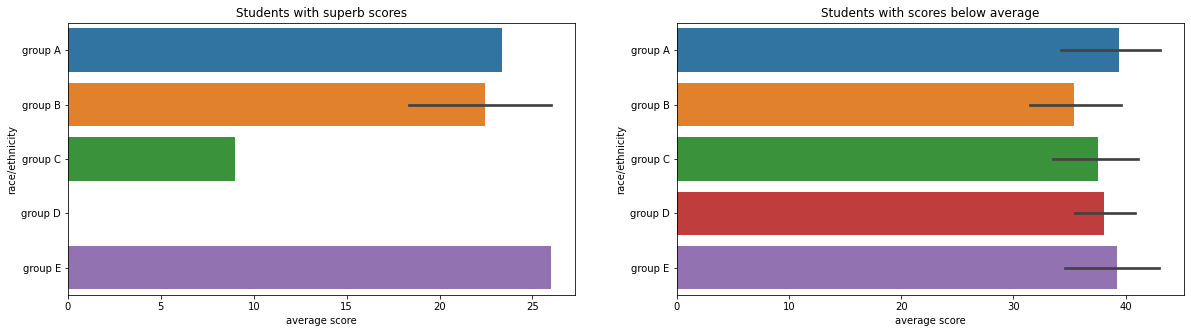

In [90]:
print("Race/ethnicity Analysis")
fig, axs = plt.subplots(ncols=2, figsize = (20,5))

sns.barplot(data=belowAvgStd, x='average score', y='race/ethnicity', ax=axs[1])
axs[1].set_title('Students with scores below average')

sns.barplot(data=superbStd, x='average score', y='race/ethnicity', ax=axs[0])
axs[0].set_title('Students with superb scores')


While there are no major differences in race/ethnicity for  students with scores below average, we don't have students with superb scores in the Group D, and very few in group C.

Parental Education Level Analysis


Text(0.5, 1.0, 'Students with scores below average')

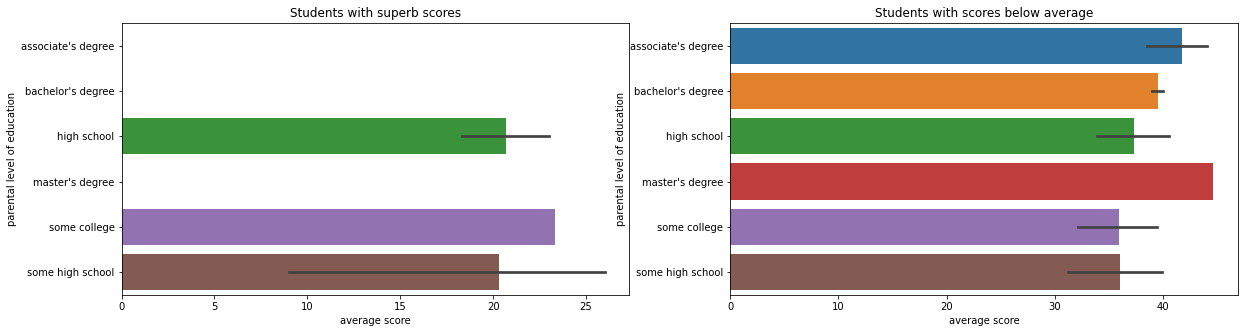

In [88]:
print("Parental Education Level Analysis")
fig, axs = plt.subplots(ncols=2, figsize = (20,5))

sns.barplot(data=superbStd, x='average score', y='parental level of education', ax=axs[0])
axs[0].set_title('Students with superb scores')

sns.barplot(data=belowAvgStd, x='average score', y='parental level of education', ax=axs[1])
axs[1].set_title('Students with scores below average')

No major differences for students with scores below average.
No records of students with superb scores with parents having a degree (associate, bachelor, master)

## Conclusions

* More data is needed to better understand what variables may affect the students' performance
* Among the variables presented, the lunch seems to be the most related to the scores obtained
* There are slightly differences in performance by gender, specially regarding Reading and Writing scores